In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#0 = brulé
#1 = en feu
#2 = verdure

In [3]:
def create_NDVI(n):
  NDVI=np.zeros(n)
  lamb=0.1
  #generation de ndvi
  x0=random.random()
  NDVI[0]=x0
  for i in range(1,n):
      NDVI[i]=min(max(NDVI[i-1]+ lamb*(random.random()-0.5),0.2),1)
  return(NDVI)

In [4]:
def sigmoide(x):
  return (1/(1-np.exp(-x)))

In [5]:
def fonction_a_trouver (a,b,ndvi,vent):
  return (ndvi*(a*vent+b))

In [6]:
def automate_cellulaire_unidimentionel (a,b, NDVI, point, vent, temps_en_feu):
  points_en_feu = [point]
  n=len(NDVI)
  tab=np.zeros(n)
  for i in range (n):
    tab[i]=2
  tab[point]=1
  temps = np.zeros(n)
  nb_points_en_feu=1
  nb_points_brulés=0
  while (nb_points_en_feu>0):
    new_points_en_feu=[]
    nb_points_en_feu=0
    for i in points_en_feu:
      if (i>0 and tab[i-1]==2 and 0.5<fonction_a_trouver(a, b, NDVI[i-1],-vent)):
        tab[i-1]=1
        new_points_en_feu.append(i-1)
        nb_points_en_feu+=1
      if (i<n-1 and tab[i+1]==2 and 0.5<fonction_a_trouver(a, b, NDVI[i+1],vent)):
        tab[i+1]=1
        new_points_en_feu.append(i+1)
        nb_points_en_feu+=1
      temps[i]+=1
      if (temps[i]==temps_en_feu):
        tab[i]=0
        nb_points_brulés+=1
      else : 
        new_points_en_feu.append(i)
        nb_points_en_feu+=1
    points_en_feu = new_points_en_feu
  return nb_points_brulés

In [7]:
liste_NDVI_point_vent_tempsenfeu_val=[]
n=1000
for i in range(100):
  NDVI=create_NDVI(n)
  point=n//2
  vent=random.random()
  tempsenfeu=1
  a=0.2
  b=1.1
  val=automate_cellulaire_unidimentionel (a,b, NDVI, point, vent, tempsenfeu)
  print(val)
  liste_NDVI_point_vent_tempsenfeu_val.append([NDVI,point,vent,tempsenfeu,val])


91
59
1
512
532
739
1
1
897
1
32
522
84
1
504
1
1
1000
1
1
778
132
396
112
639
1
247
15
1
1
719
402
283
1
434
44
2
717
1
226
477
64
1
733
357
1
1
1
253
1
1
1
1
699
609
5
2
607
520
1
396
652
59
522
828
19
367
540
453
1
564
576
2
2
893
1
45
555
34
500
1000
1
52
338
288
1
200
1
1
165
557
1
11
261
413
1
1
113
46
1


In [8]:
def calcul(a,b,liste_NDVI_point_vent_tempsenfeu_val,nb_moyennement):
  sum=0
  for j in liste_NDVI_point_vent_tempsenfeu_val:
    val=0
    for i in range(nb_moyennement):
      val+=automate_cellulaire_unidimentionel(a,b, j[0],j[1],j[2],j[3])
    sum+=np.abs(j[4]-val/nb_moyennement)
  return sum/len(liste_NDVI_point_vent_tempsenfeu_val)

In [9]:
def apprentisage (a,b,liste_NDVI_point_vent_tempsenfeu_val,nb_moyennement,seuil,xs,ys,zs,h):
  xs.append(a)
  ys.append(b)
  val=calcul(a, b, liste_NDVI_point_vent_tempsenfeu_val, nb_moyennement)
  zs.append(val)
  print("val =",val)
  xs.append(a)
  ys.append(b)
  val=calcul(a, b, liste_NDVI_point_vent_tempsenfeu_val, nb_moyennement)
  zs.append(val)
  print("val =",val,"et h=",h)
  if (val<0.1):
    print(a,b)
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(xs, ys, zs, c='m')
    ax.scatter([0.2], [1.1], [0], c='r')
    ax.set_xlabel("paramètre du vent")
    ax.set_ylabel("paramètre de la végétation")
    ax.set_zlabel("erreur")
    plt.show()
    return (a,b)
  a_0=val_aph=calcul(a-h, b-h, liste_NDVI_point_vent_tempsenfeu_val, nb_moyennement)
  a_1=val_aph=calcul(a-h, b, liste_NDVI_point_vent_tempsenfeu_val, nb_moyennement)
  a_2=val_aph=calcul(a-h, b+h, liste_NDVI_point_vent_tempsenfeu_val, nb_moyennement)
  a_3=val_aph=calcul(a, b-h, liste_NDVI_point_vent_tempsenfeu_val, nb_moyennement)
  a_4=val_aph=calcul(a, b+h, liste_NDVI_point_vent_tempsenfeu_val, nb_moyennement)
  a_5=val_aph=calcul(a+h, b-h, liste_NDVI_point_vent_tempsenfeu_val, nb_moyennement)
  a_6=val_aph=calcul(a+h, b, liste_NDVI_point_vent_tempsenfeu_val, nb_moyennement)
  a_7=val_aph=calcul(a+h, b+h, liste_NDVI_point_vent_tempsenfeu_val, nb_moyennement)
  min_=min(a_0,a_1,a_2,a_3,a_4,a_5,a_6,a_7)
  ok=False
  if a_0==min_ and min_<val:
    a-=h
    b-=h
    ok=True
  elif a_1==min_ and min_<val:
    a-=h
    ok=True
  elif a_2==min_ and min_<val:
    a-=h
    b+=h
    ok=True
  elif a_3==min_ and min_<val:
    b-=h
    ok=True
  elif a_4==min_ and min_<val:
    b+=h
    ok=True
  elif a_5==min_ and min_<val:
    a+=h
    b-=h
    ok=True
  elif a_5==min_ and min_<val:
    a+=h
    ok=True
  elif a_6==min_ and min_<val:
    a+=h
    b+=h
    ok=True
  else:
    apprentisage (a,b,liste_NDVI_point_vent_tempsenfeu_val,nb_moyennement,seuil,xs,ys,zs,h+0.01)
  if ok : 
    print(a,b)
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(xs, ys, zs, c='m')
    ax.scatter([0.2], [1.1], [0], c='r')
    ax.set_xlabel("paramètre du vent")
    ax.set_ylabel("paramètre de la végétation")
    ax.set_zlabel("erreur")
    plt.show()
    apprentisage (a,b,liste_NDVI_point_vent_tempsenfeu_val,nb_moyennement,seuil,xs,ys,zs,0.01)

val = 198.24
val = 198.24 et h= 0.01
val = 198.24
val = 198.24 et h= 0.02
val = 198.24
val = 198.24 et h= 0.03
val = 198.24
val = 198.24 et h= 0.04
val = 198.24
val = 198.24 et h= 0.05
val = 198.24
val = 198.24 et h= 0.060000000000000005
val = 198.24
val = 198.24 et h= 0.07
val = 198.24
val = 198.24 et h= 0.08
val = 198.24
val = 198.24 et h= 0.09
val = 198.24
val = 198.24 et h= 0.09999999999999999
val = 198.24
val = 198.24 et h= 0.10999999999999999
val = 198.24
val = 198.24 et h= 0.11999999999999998
val = 198.24
val = 198.24 et h= 0.12999999999999998
val = 198.24
val = 198.24 et h= 0.13999999999999999
val = 198.24
val = 198.24 et h= 0.15
val = 198.24
val = 198.24 et h= 0.16
val = 198.24
val = 198.24 et h= 0.17
val = 198.24
val = 198.24 et h= 0.18000000000000002
val = 198.24
val = 198.24 et h= 0.19000000000000003
val = 198.24
val = 198.24 et h= 0.20000000000000004
val = 198.24
val = 198.24 et h= 0.21000000000000005
val = 198.24
val = 198.24 et h= 0.22000000000000006
val = 198.24
val = 1

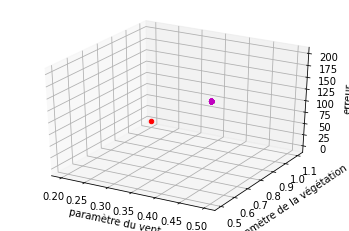

val = 94.03
val = 94.03 et h= 0.01
val = 94.03
val = 94.03 et h= 0.02
val = 94.03
val = 94.03 et h= 0.03
val = 94.03
val = 94.03 et h= 0.04
val = 94.03
val = 94.03 et h= 0.05
0.45 0.8900000000000001


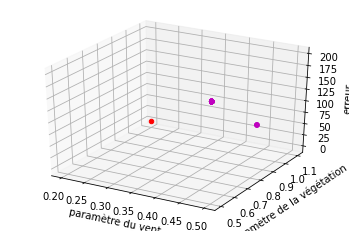

val = 83.32
val = 83.32 et h= 0.01
0.44 0.9000000000000001


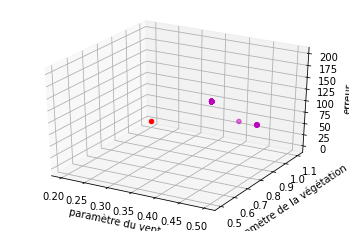

val = 81.41
val = 81.41 et h= 0.01
0.43 0.9100000000000001


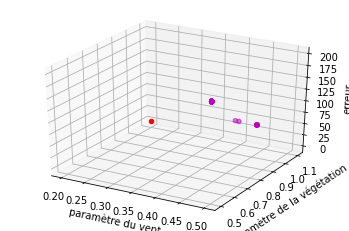

val = 76.69
val = 76.69 et h= 0.01
0.42 0.9200000000000002


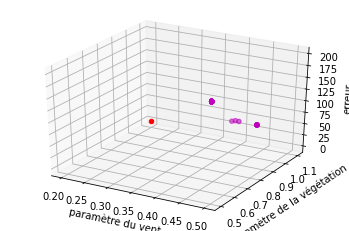

val = 70.06
val = 70.06 et h= 0.01
0.41 0.9300000000000002


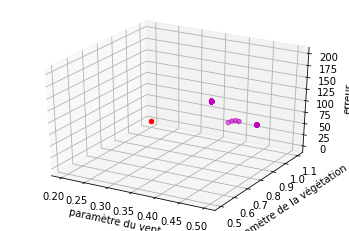

val = 65.26
val = 65.26 et h= 0.01
0.41 0.9400000000000002


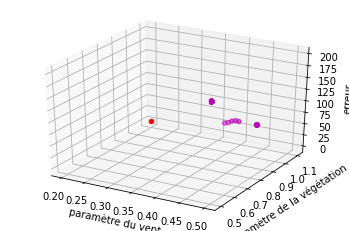

val = 57.76
val = 57.76 et h= 0.01
0.39999999999999997 0.9500000000000002


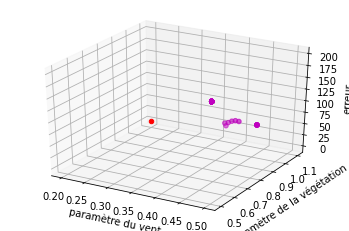

val = 51.53
val = 51.53 et h= 0.01
0.39999999999999997 0.9600000000000002


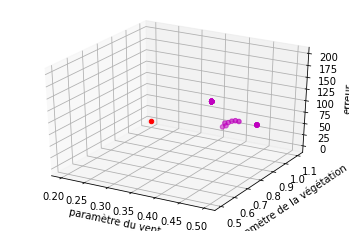

val = 47.98
val = 47.98 et h= 0.01
0.38999999999999996 0.9700000000000002


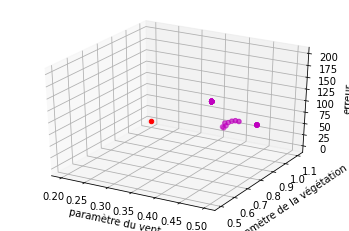

val = 46.75
val = 46.75 et h= 0.01
0.37999999999999995 0.9800000000000002


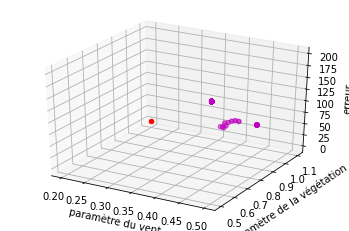

val = 43.24
val = 43.24 et h= 0.01
0.36999999999999994 0.9900000000000002


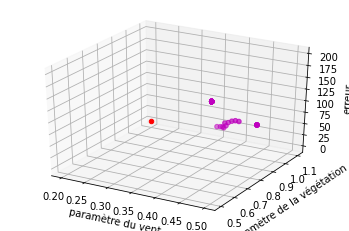

val = 38.44
val = 38.44 et h= 0.01
0.35999999999999993 1.0000000000000002


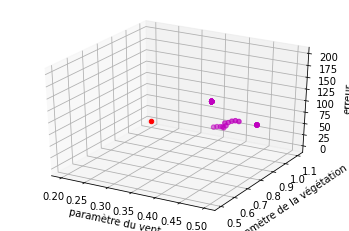

val = 35.72
val = 35.72 et h= 0.01
0.3499999999999999 1.0100000000000002


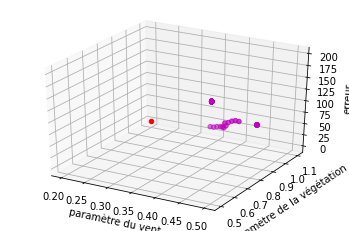

val = 30.2
val = 30.2 et h= 0.01
0.3399999999999999 1.0200000000000002


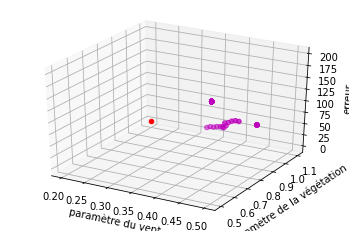

val = 26.94
val = 26.94 et h= 0.01
0.3299999999999999 1.0300000000000002


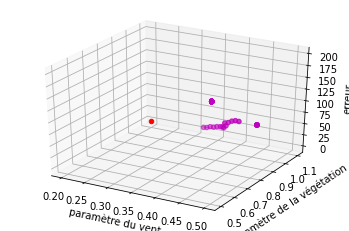

val = 24.6
val = 24.6 et h= 0.01
0.3199999999999999 1.0400000000000003


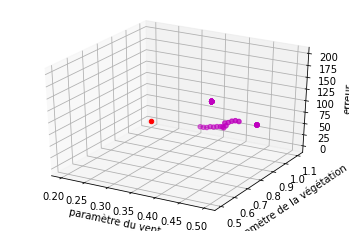

val = 20.04
val = 20.04 et h= 0.01
0.3199999999999999 1.0500000000000003


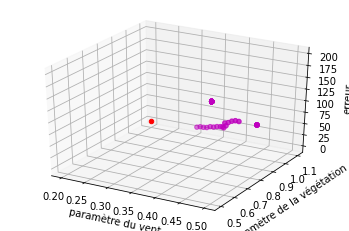

val = 13.34
val = 13.34 et h= 0.01
0.3099999999999999 1.0600000000000003


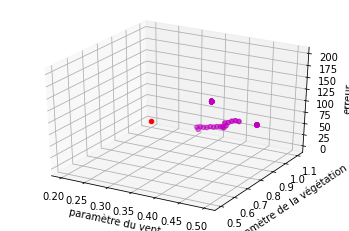

val = 11.8
val = 11.8 et h= 0.01
val = 11.8
val = 11.8 et h= 0.02
0.28999999999999987 1.0600000000000003


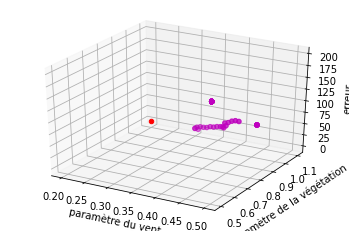

val = 11.57
val = 11.57 et h= 0.01
0.27999999999999986 1.0700000000000003


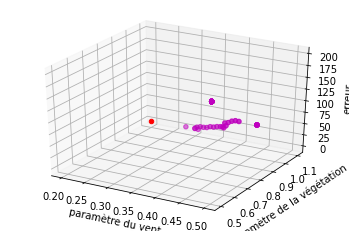

val = 9.36
val = 9.36 et h= 0.01
0.26999999999999985 1.0700000000000003


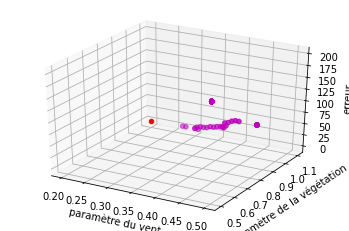

val = 9.22
val = 9.22 et h= 0.01
0.25999999999999984 1.0800000000000003


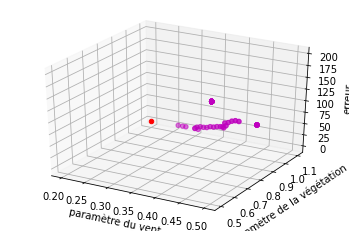

val = 7.29
val = 7.29 et h= 0.01
0.24999999999999983 1.0800000000000003


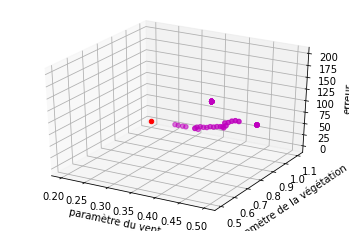

val = 6.53
val = 6.53 et h= 0.01
val = 6.53
val = 6.53 et h= 0.02
0.22999999999999984 1.1000000000000003


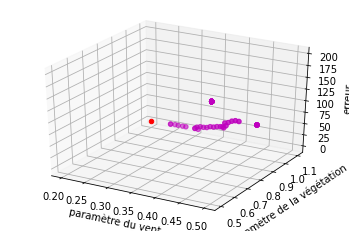

val = 5.27
val = 5.27 et h= 0.01
0.21999999999999983 1.0900000000000003


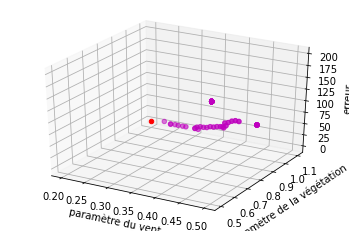

val = 2.71
val = 2.71 et h= 0.01
0.20999999999999983 1.0900000000000003


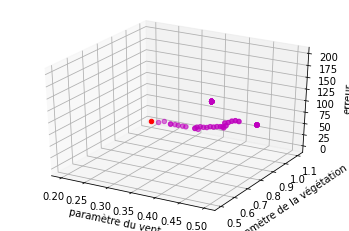

val = 0.82
val = 0.82 et h= 0.01
0.19999999999999982 1.1000000000000003


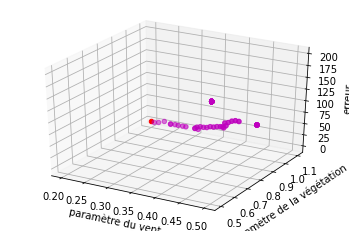

val = 0.0
val = 0.0 et h= 0.01
0.19999999999999982 1.1000000000000003


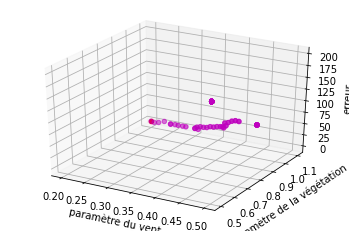

In [10]:
apprentisage (0.5, 0.5, liste_NDVI_point_vent_tempsenfeu_val,1,0.0000001,[],[],[],0.01)